#  ----------------------------------------- Изучение рынка игр -------------------------------------

## Описание проекта 📃
 
* Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

* Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

* В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------
## Данные 💾

### Описание данных*
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

##### *Данные за 2016 год могут быть неполными.

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

## Цель  проекта 🎯
* Выявить потенциально популярные продукты и определяющие успешность игры закономерности для планирования рекламных компаний.





## План по выполнению проекта 
* Шаг 1. Открытие файла с данными и изучение общей информации
* Шаг 2. Подготовка данных
* Шаг 3. Провединие исследовательского анализа данных
* Шаг 4. Составление портрета пользователя каждого региона
* Шаг 5. Проверка гипотез
* Шаг 6. Общий вывод

#  Шаг 1. Открытие файла с данными и изучение общей информации. 


In [1]:
#Подгружаем необходимые библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
from scipy import stats as st
import statsmodels.api as sm
from pylab import rcParams

In [2]:
#Подгружаем файл с данными
df=pd.read_csv('/datasets/games.csv')

In [3]:
#Выводим информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Выведем первые 5 строк
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#Посмотрим наличие дубликатов
print('Дубликаты в данных :', df.duplicated().sum())

Дубликаты в данных : 0


<div class="alert alert-info">
    
**ВЫВОД (ШАГ 1):**📝
* **В датафрейме 11 столбцов с данными**
* **Дубликаты не обнаружены**
* **Имеются пропуски в столбцах:** Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.
* **Необходимо изменить типы данных:** 
    Year_of_Release (Float >>> Int),
    Critic_score (Float >>> Int)
    User_score (Object >>> Float),
    
<br>
    
</div>

#  Шаг 2. Подготовка данных. 
* Замена названий столбцов (приведение к нижнему регистру);
* Преобразование данных в нужные типы. В каких столбцах был заменён тип данных и почему;
* Обработка пропусков при необходимости:
1. Почему заполнили пропуски определённым образом или почему не стали это делать;
2. Опишисание причин, которые могли привести к пропускам;
3. Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;


#### Замена названий столбцов

In [6]:
#Приведём название столбцов к нижнему регистру
df.columns = map(str.lower, df.columns)

In [7]:
#Проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Обработка столбца 'year_of_release'

In [8]:
df['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [9]:
#Поскольку количество пропусков 269, что составляет менее 2% данных, заполним пропуски медианой
df['year_of_release']=df['year_of_release'].fillna(df['year_of_release'].median())

In [10]:
#Переведём значение столбца year_of_release в int, т.к. год выпуска игры не может быть дробным
df['year_of_release']=df['year_of_release'].astype('int')

In [11]:
df['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

#### Обработка столбцов 'name' и 'genre'

In [12]:
#Поскольку количество пропусков в столбцах 'name' и 'genre' всего 2, ими можно принебречь и удалить строки с этими пропусками
df.dropna(subset=['name', 'genre'], inplace=True)

In [13]:
#Проверим вывод
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


#### Обработка столбца 'critic_score'

In [14]:
#Изучим значения столбца
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [15]:
#Поскольку все значения в рейтинге имеют целые числа, можно перевести из float в int
df['critic_score']=df['critic_score'].astype('Int64')

In [16]:
#Проверим
df['critic_score'].head(10)

0     76
1    NaN
2     82
3     80
4    NaN
5    NaN
6     89
7     58
8     87
9    NaN
Name: critic_score, dtype: Int64

#### Обработка столбца 'user_score'

In [17]:
#Выведем уникальные значения столбца
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
1         2
0.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Оказалось помимо пропусков достаточно много значений 'tbd', в данном случае сделаем предположение, 
что эта аббревиатура означает,'To be determinated', то есть "Будет определено". 
В данном случае скорее всего данные просто ещё не добавлены. Следует заменить их на NaN чтобы была возможность проводить числовые операции

In [18]:
#Заменим 'tbd' на нулевое значение
df['user_score']=df['user_score'].str.replace('tbd', 'NaN')

In [19]:
#Числовые данные рейтинга не должны быть object, переведём в float, поскольку многие оценки - дробные числа.
df['user_score']=df['user_score'].astype('Float64')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [21]:
#Посчитаем суммарные продажи по всем регионам
df['world_sales']=df['na_sales']+df['jp_sales']+df['other_sales']+df['eu_sales']

In [22]:
#проверим вывод
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<div class="alert alert-info">
    
**ВЫВОД (ШАГ 2):**📝
* **Названия столбцов приведены к нижнему регистру**
* **Дубликаты не обнаружены**
* **Удалены пропуски в столбцах :** Name, Genre - т.к. всего 2 пропуска и этими данными можно принебречь
* **Удалены пропуски в столбцах :** Year_of_Release - заполнены медианой, т.к. значений меньше 2%, это не даст сильного искажения данных
* **Пропуски в столбцах не заполнялись:** Critic_Score, User_Score, Rating - т.к. пропущенных значений очень много, а заполнение значений рейтингов медианой или средним очень сильно исказит дальнейшие исследования т.к. будет очень большая концентрация наблюдений со схожими параметрами. Но при этом удалять строки с пропусками тоже не корректно т.к. это может привести к серьёзным отклонениям по другим зависимым от них столбцам - год выпуска, платформа
* **Возможные причины возникновения пропусков:** 
* **1. User_Score** Отсутствующие значения в пользовательских рейтингах могли означать просто отсутствие оценок в конкретном интернет магазине.
* **2. Critic_Score** Поскольку достоверно не известно, откуда взята информаци об оценке критиками, можно предположить, что просто не вся информация заполнена в данном случае
* **Аббревиатура 'tbd' в 'user_score':** Данная аббревиатура скорее всего означает 'To be determinated', то есть "Будет определено". То есть в данный момент значения отсутствуют или не попали в выгрузку. Что в данном случае равноценно пропущенным значениям в данном столбце.      

* **Создан столбец 'world_sales', суммирующий все продажи по миру**
<br>
    
</div>

#  Шаг 3. Исследовательский анализ данных. 
* Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмём данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
* Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
* Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
* Соотнесём выводы с продажами игр на других платформах.
* Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

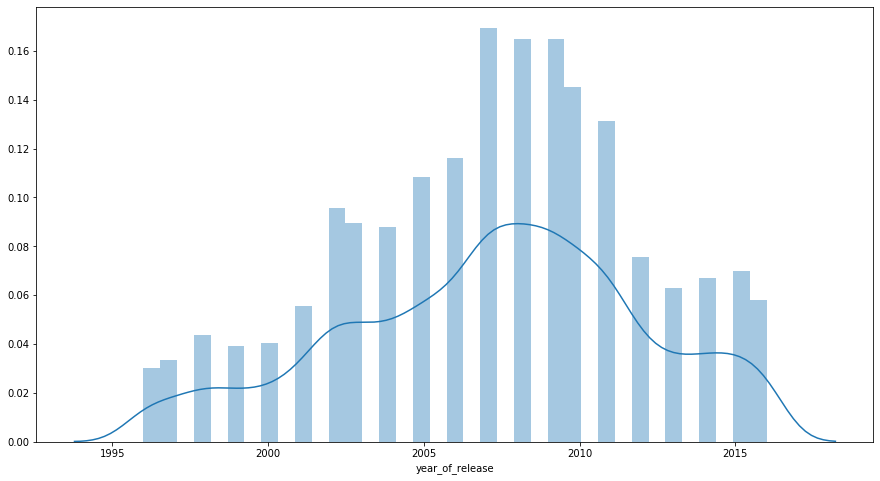

In [95]:
#Построим график выпуска игр по годам
rcParams['figure.figsize'] = 15, 8
sns.distplot(df['year_of_release'])

In [24]:
#Проверим, в каких интервалах лежат большинство игр
df['year_of_release'].describe(percentiles=[.05,.97])

count    16713.000000
mean      2006.494525
std          5.828405
min       1980.000000
5%        1996.000000
50%       2007.000000
97%       2015.640000
max       2016.000000
Name: year_of_release, dtype: float64

In [25]:
#Попробуем убрать игры, которые выпускались до 1996 года и посмотреть распределение по платформам и годам
#Уберём игры, выпускавшиеся до 2013 годаб т.к. такая выборка будет более информативна для нашей задачи и сохраним новую переменную
variable=1995 
df=df.query('year_of_release > @variable') #Срез для игр после 1995 года

In [26]:
#Сделаем сводную таблицу
All_time_sales_platform=df.pivot_table(index='platform',  values='world_sales', aggfunc='sum')

In [27]:
All_time_sales_platform=All_time_sales_platform.sort_values(by='world_sales', ascending=False)

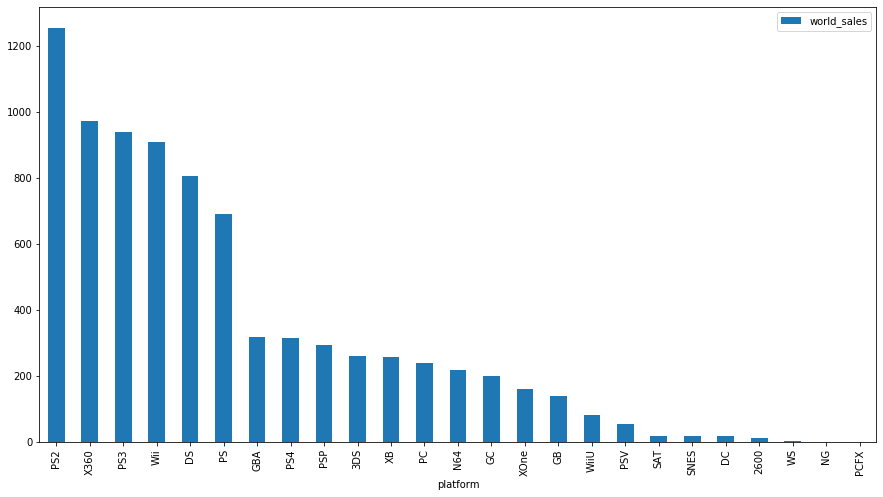

In [94]:
#Построим график с распределением по платформам и продажам
rcParams['figure.figsize'] = 15, 8
All_time_sales_platform.plot(kind='bar')

* Исходя из графика видно, что топы продаж, это серия PlayStation, Xbox, Nintendo Wii + портативные платформы PSP и DS.



In [29]:
#Попробуем проанализировать срок жизни платформы на примере Playstatin, Xbox и Wii
PS_dict=['PS2'] #Словарь для платформ Playstation
PS2_sales=df.query('platform in @PS_dict')    #Условие для отбора значений
PS2_sales=PS2_sales.pivot_table(index='platform', columns='year_of_release', values='world_sales', aggfunc='sum')

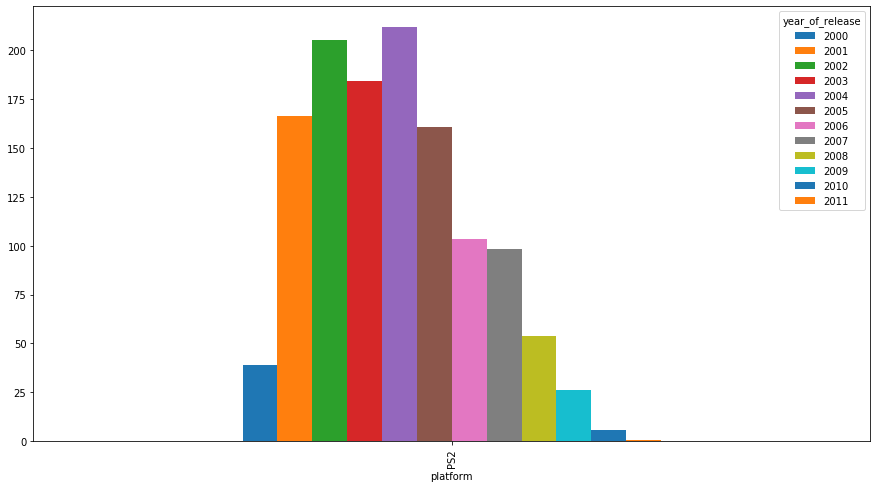

In [93]:
rcParams['figure.figsize'] = 15, 8
PS2_sales.plot(kind='bar')

In [31]:
XBOX_dict=['X360'] #Словарь для платформ X360
X360_sales=df.query('platform in @XBOX_dict')    #Условие для отбора значений
X360_sales=X360_sales.pivot_table(index='platform', columns='year_of_release', values='world_sales', aggfunc='sum')

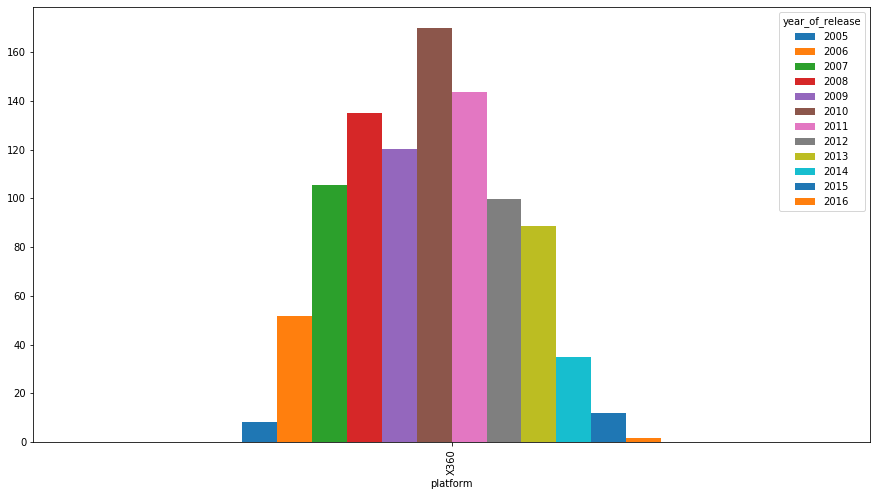

In [92]:
rcParams['figure.figsize'] = 15, 8
X360_sales.plot(kind='bar')

In [33]:
Wii_dict=['Wii'] #Словарь для платформы Wii
Wii_sales=df.query('platform in @Wii_dict')    #Условие для отбора значений
Wii_sales=Wii_sales.pivot_table(index='platform', columns='year_of_release', values='world_sales', aggfunc='sum')

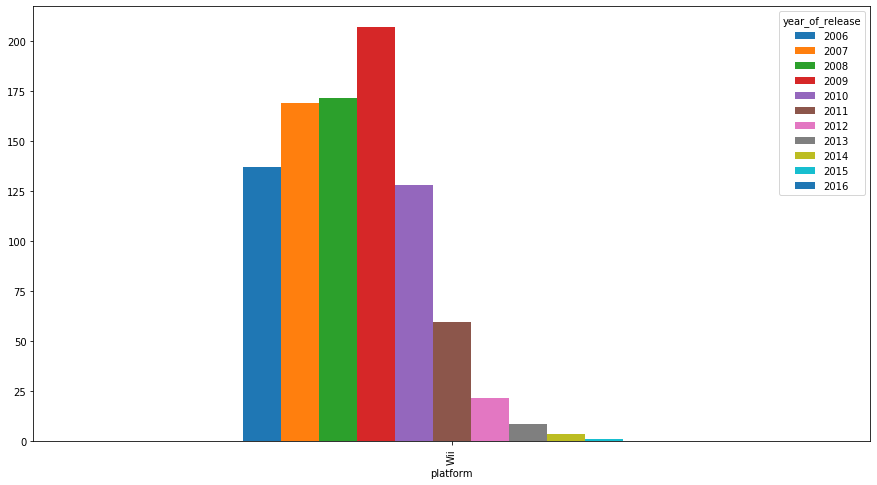

In [91]:
rcParams['figure.figsize'] = 15, 8
Wii_sales.plot(kind='bar')

* Судя по графикам, можно сделать вывод, что максимальную популярность платформа сохраняет примерно 5 лет.
* Поскольку наша задача, выявить потенциально успешные продукты на 2017год, в дальнейшем следует использовать платформы, срок жизни которых не должен быть более 5 лет, включая 2017 год. То есть наш интервал это 2013-2016. 


In [35]:
#Уберём игры, выпускавшиеся до 2013 годаб т.к. такая выборка подходит под наш актуальный период
variable=2012
df_2013=df.query('year_of_release > @variable')

In [36]:
#Посмотрим на новое распределение платформ
Actual_sales_platform=df_2013.pivot_table(index='platform', values='world_sales', aggfunc='sum') #сводная таблица по периоду 2013-16
Actual_sales_platform.sort_values(by='world_sales', ascending=False).head(5) #сортировка по убыванию

,world_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


In [37]:
Actual_sales_platform=Actual_sales_platform.sort_values(by='world_sales', ascending=False)

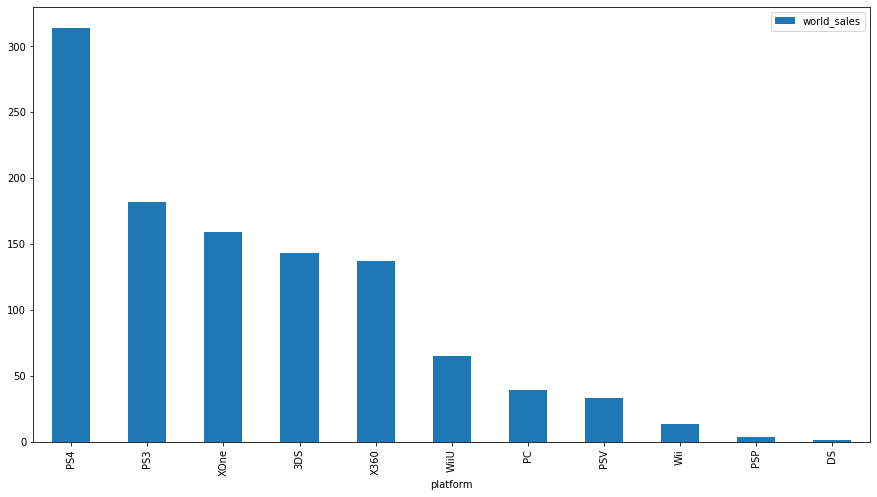

In [90]:
#Выведем графическую информацию
rcParams['figure.figsize'] = 15, 8
Actual_sales_platform.plot(kind='bar')

* Распределение платформ по продажам сильно изменилось, теперь топ 5 платформ: **PS4, PS3, XOne, 3DS, X360**

In [39]:
#Посмотрим на динамику платформ
Actual_sales_platform_dynamic=df_2013.pivot_table(index='platform', columns='year_of_release', values='world_sales', aggfunc='sum')

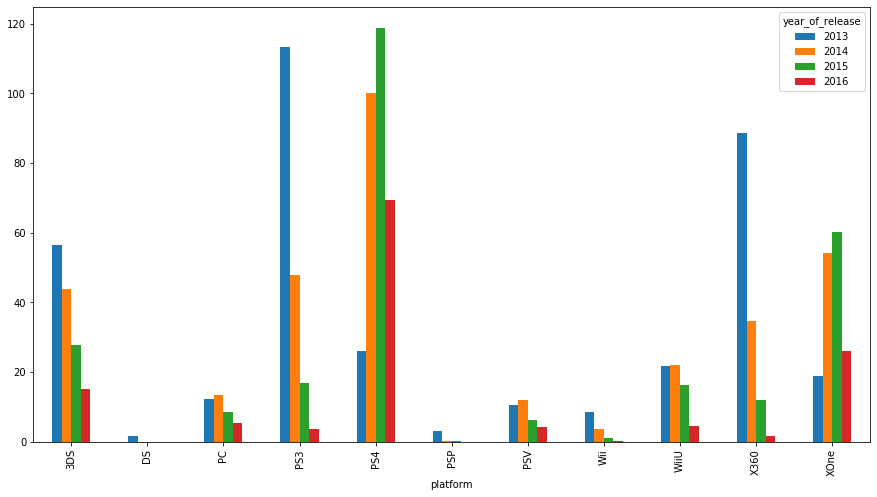

In [40]:
#Выведем на график
rcParams['figure.figsize'] = 15, 8
Actual_sales_platform_dynamic.plot(kind='bar')

#### Учитывая, что данные за 2016 могут быть не полные можно взять за критерии роста 2 фактора:
1. Отношение продаж 2015 к 2014
2. Суммарные продажи за 2016.

#### Исходя из этого можно сделать следующие выводы:
* Продажи по платформам: **3DS, PS3, WiiU и X360 - падают**
* Продажи по платформам: **XOne, PS4 - растут**

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [41]:
#Чтобы получить более точные данные, отсечём выбросы циклом на основе диаграммы размаха по нужным столбцам
df_2013_box=df_2013
for column in ['world_sales', 'na_sales', 'other_sales', 'eu_sales', 'jp_sales']:
    Q1 = df_2013_box[column].quantile(0.25)
    Q3 = df_2013_box[column].quantile(0.75)
    IQR = Q3 - Q1
    min_border = Q1-1.5*IQR
    max_border = Q3+1.5*IQR
    df_2013_box.drop(df_2013_box[(df_2013_box[column] < min_border) | (df_2013_box[column] > max_border)].index, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
#Сделаем сводную таблицу по гл.продажам игр в разбивке по платформам
games_sales_platform=df_2013_box.pivot_table(index='name', columns='platform', values='world_sales', aggfunc='sum')


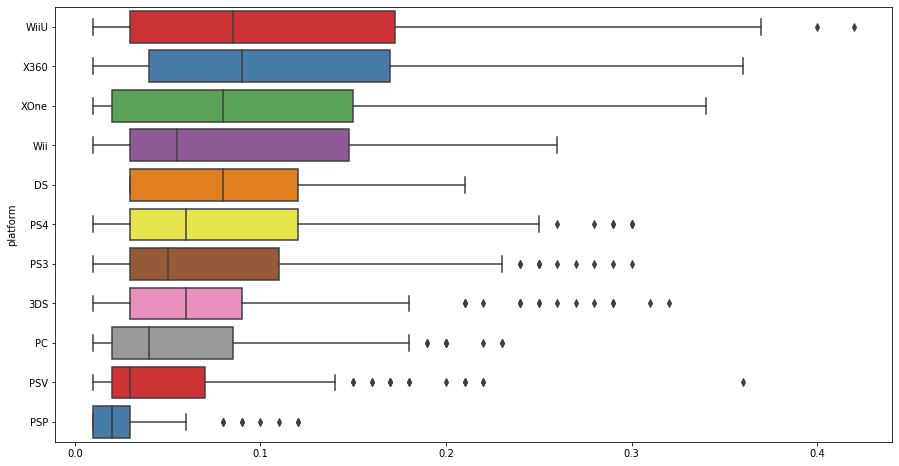

In [43]:
rcParams['figure.figsize'] = 15, 8
order = ['WiiU','X360', 'XOne','Wii', 'DS','PS4', 'PS3', '3DS',   'PC', 'PSV', 'PSP']
ax = sns.boxplot(data=games_sales_platform, palette="Set1", orient="h", order=order) 
                

In [44]:
#Посмотрим также информацию в виде таблицы
games_sales_platform.describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,201.000000,5.000000,135.000000,197.000000,211.000000,58.000000,311.000000,14.000000,70.000000,99.000000,141.000000
mean,0.073184,0.094000,0.061704,0.078985,0.084645,0.032069,0.052862,0.092857,0.113571,0.113434,0.102411
std,0.066339,0.075033,0.057854,0.068853,0.072073,0.029780,0.048165,0.085073,0.106649,0.091252,0.089673
min,0.010000,0.030000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.030000,0.030000,0.020000,0.030000,0.030000,0.010000,0.020000,0.030000,0.030000,0.040000,0.020000
50%,0.060000,0.080000,0.040000,0.050000,0.060000,0.020000,0.030000,0.055000,0.085000,0.090000,0.080000
75%,0.090000,0.120000,0.085000,0.110000,0.120000,0.030000,0.070000,0.147500,0.172500,0.170000,0.150000
max,0.320000,0.210000,0.230000,0.300000,0.300000,0.120000,0.360000,0.260000,0.420000,0.360000,0.340000


* Если рассматривать все продажи, то самые прибыльные платформы: **X360 и WiiU** 
* А по средним продажам на игру: **X360, WiiU и XOne** 


### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [45]:
#Выберем платформц PS4
PS4_plot=df_2013.query('platform=="PS4"')

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


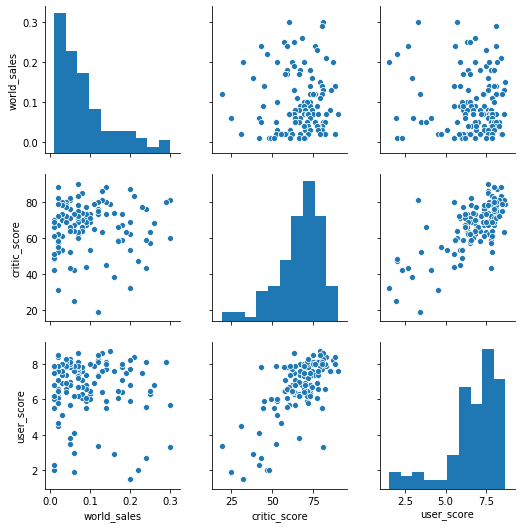

In [46]:
#Посмотрим на взаимосвязь уровня продаж и оценок критиков и юзеров
cols = ['world_sales', 'critic_score','user_score']
sns_plot = sns.pairplot(PS4_plot[cols])

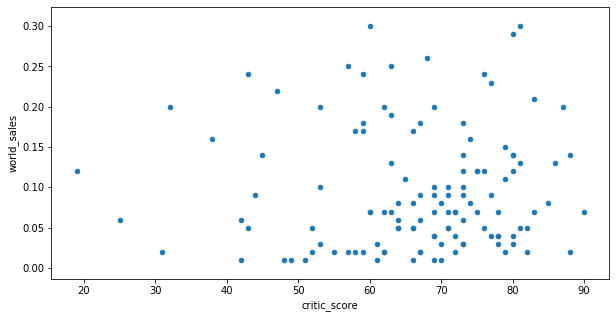

In [47]:
#и отдельно по user_score/world_sales
rcParams['figure.figsize'] = 10, 5
PS4_plot.plot(x='critic_score', y='world_sales', kind='scatter')

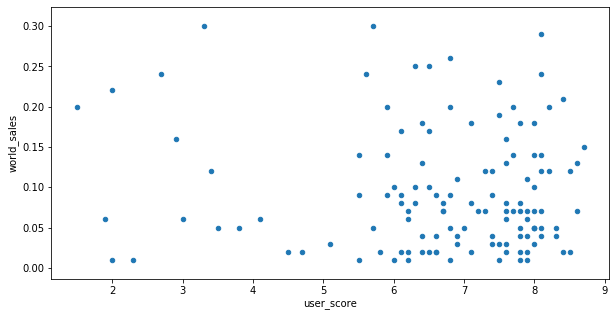

In [48]:
#И по рейтингу критиков
rcParams['figure.figsize'] = 10, 5
PS4_plot.plot(x='user_score', y='world_sales', kind='scatter')

In [49]:
PS4_plot.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
year_of_release,1.000000,-0.389205,-0.324123,-0.025369,-0.424214,0.115450,0.163620,-0.432147
na_sales,-0.389205,1.000000,0.400118,-0.079862,0.867355,-0.064547,-0.207607,0.810282
eu_sales,-0.324123,0.400118,1.000000,-0.196626,0.756285,-0.015683,-0.087747,0.732725
jp_sales,-0.025369,-0.079862,-0.196626,1.000000,-0.120804,0.216898,0.315440,0.226438
other_sales,-0.424214,0.867355,0.756285,-0.120804,1.000000,-0.027419,-0.176230,0.921035
critic_score,0.115450,-0.064547,-0.015683,0.216898,-0.027419,1.000000,0.700621,0.021172
user_score,0.163620,-0.207607,-0.087747,0.315440,-0.176230,0.700621,1.000000,-0.083154
world_sales,-0.432147,0.810282,0.732725,0.226438,0.921035,0.021172,-0.083154,1.000000


### После построения гистограм рассеивания и вывода коэффициента корреляции можно сделать следующие выводы:
* Коээфициент корреляции между оценками пользователей и глобальными продажами: -0.031957 - незначительно отрицательная взаимосвязь, значение очень близкое к нулю. То есть оценки пользователей и продажи практически независимы между собой

* Коээфициент корреляции между оценками критиков и глобальными продажами:: 0.406568 - положительная взаимосвязь, что может говорить о положительной зависимости между оценками критиков т.е. есть влияние оценки критиков и глобальных продаж

* Если посмотрим на диаграммы, то видно, что прослеживается тенденция к увеличению продаж при увеличении оценки критиков.
* В то время как по оценкам пользователей нельзя однозначно проследить зависимость.

### Будет ли принципиально различаться распределение по другим платформам?

In [50]:
#Выберем платформц PS4
Other_plot=df_2013.query('platform != "PS4"')

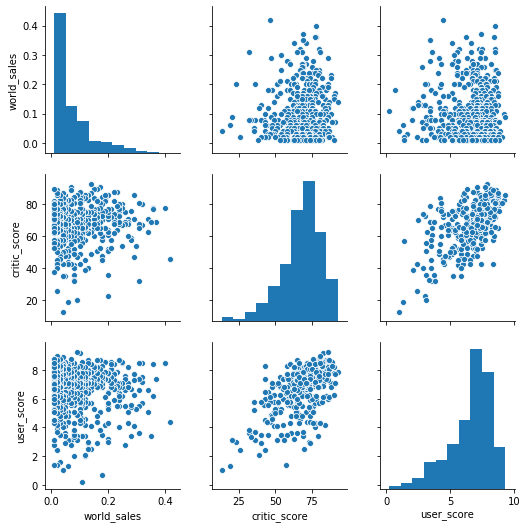

In [51]:
#Посмотрим на взаимосвязь уровня продаж и оценок критиков и юзеров для всех других платформ
cols = ['world_sales', 'critic_score','user_score']
sns_plot = sns.pairplot(Other_plot[cols])

In [52]:
Other_plot.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
year_of_release,1.000000,-0.099117,-0.052947,-0.108520,-0.137573,0.241621,-0.000904,-0.144837
na_sales,-0.099117,1.000000,0.584027,-0.190482,0.812125,-0.004829,-0.101977,0.871408
eu_sales,-0.052947,0.584027,1.000000,-0.327825,0.669033,0.136757,-0.096231,0.723311
jp_sales,-0.108520,-0.190482,-0.327825,1.000000,-0.133160,0.089662,0.285587,0.149334
other_sales,-0.137573,0.812125,0.669033,-0.133160,1.000000,0.033990,-0.040666,0.841756
critic_score,0.241621,-0.004829,0.136757,0.089662,0.033990,1.000000,0.584363,0.087618
user_score,-0.000904,-0.101977,-0.096231,0.285587,-0.040666,0.584363,1.000000,-0.012856
world_sales,-0.144837,0.871408,0.723311,0.149334,0.841756,0.087618,-0.012856,1.000000


### После построения гистограм рассеивания и вывода коэффициента корреляции можно сделать следующие выводы для всех платформ, кроме PS4:
* Коээфициент корреляции между оценками пользователей и глобальными продажами: -0.001122 - ОЧЕНЬ незначительно отрицательная взаимосвязь, значение очень близкое к нулю. То есть оценки пользователей и продажи практически независимы между собой

* Коээфициент корреляции между оценками критиков и глобальными продажами:: 0.281251 - положительная взаимосвязь, но менее выраженная взаимосвязь, что может говорить о положительной зависимости между оценками критиков т.е. есть влияние оценки критиков и глобальных продаж

### В итоге можем говорить о том, что:
* Оценки критиков **влияют** на глобальные продажи (Особенно на PS4)
* Оценки пользователей **НЕ влияют** на глобальные продажи



### Далее выясним:

* Общее распределение игр по жанрам. 
* Что можно сказать о самых прибыльных жанрах? 
* Выделяются ли жанры с высокими и низкими продажами?

In [53]:
#Сделаем сводную таблицу с распределением игр по жанрам
allgames=df_2013.pivot_table(index='genre', values='name', aggfunc='count')

In [54]:
#Отсортируем по убыванию и выведем на экран
allgames=allgames.sort_values(by='name', ascending=False)

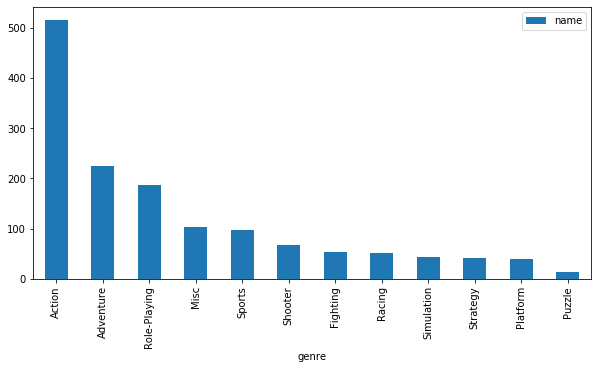

In [55]:
allgames.plot(kind='bar')

### Безоговорочным лидером стал жанр 'Action', а вот паззлов ('Puzzle') выпускают мало.

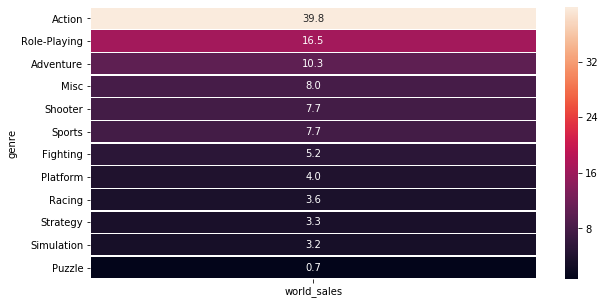

In [56]:
#Построим тепловую карту (heatmap), чтобы посмотреть какие жанры принесли больше всего денег
genre_sales = df_2013.pivot_table(
                        index='genre', 
                        values='world_sales', 
                        aggfunc=sum).fillna(0).applymap(float).sort_values(by='world_sales', ascending=False)
                        

sns.heatmap(genre_sales, annot=True, fmt=".1f", linewidths=.5)



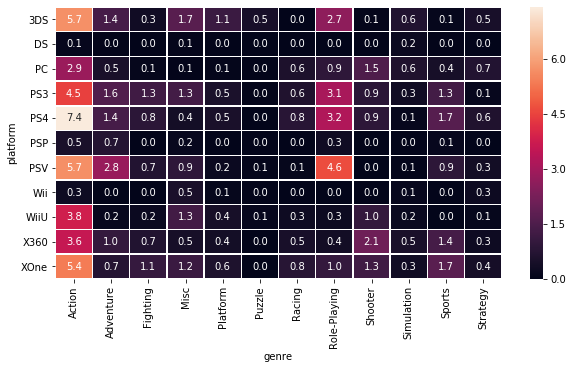

In [57]:
#Заодно посмотрим с распределением по платформам
platform_genre_sales = df_2013.pivot_table(
                        index='platform', 
                        columns='genre', 
                        values='world_sales', 
                        aggfunc=sum).fillna(0).applymap(float)


sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)


### Проаназировав информацию, мы можем ответить на наши вопросы:

* ТОП 5 жанров по **количеству** игр: **Action, Role-Playing, Adventure, Sports, Shooter.**
* ТОП 5 самых **прибыльных** жанров:  **Action, Shooter, Sports, Role-Playing, Misc.**
* Жанр с самыми низкими продажами: **Puzzle**



<div class="alert alert-info">
    
**ВЫВОД (ШАГ 3):**📝
    
* До **2000** года выпускалось сравнительно немного игр, а **пик** выпущенных игр приходится на **2007-2010 год**
* В ходе исследования был выявлен примерный срок жизни платформ - **5 лет**
* Для того, чтобы наш прогноз был корректен, был выбран **период 2013-2016 годов**, чтобы неактуальные платформы не попали в расчёт прогноза
* Выявили платформы, у которых продажи падают: **3DS, PS3, WiiU и X360**. И наоборот растут: **XOne, PS4**
* То есть наиболее перспективные платформы - **XOne, PS4**
* Cамые прибыльные платформы: **X360 и PS4** 
* Cредниe продажы на игру: **X360 и XOne**   
* Узнали, что **оценки критиков влияют** на глобальные продажи, а вот **оценки пользователей - нет.**
* Выяснили ТОП 5 жанров по **количеству** игр: **Action, Role-Playing, Adventure, Sports, Shooter.**
* Выяснили ТОП 5 самых **прибыльных** жанров:  **Action, Shooter, Sports, Role-Playing, Misc.**
* И жанр с самыми низкими продажами и количеством игр: **Puzzle**


<br>
    
</div>

#  Шаг 4. Составление портрета пользователя каждого региона. 
**Определим для пользователя каждого региона (NA, EU, JP):**
* Самые популярные платформы (топ-5). Различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?


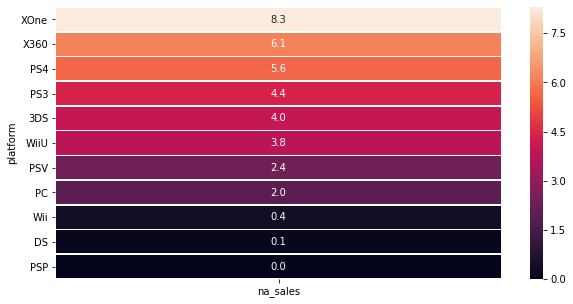

In [58]:
#Построим тепловую карту (heatmap), чтобы посмотреть самые популярные платформы в регионе NA
na_sales = df_2013.pivot_table(
                        index='platform', 
                        values='na_sales', 
                        aggfunc=sum).fillna(0).applymap(float).sort_values(by='na_sales', ascending=False)
                        

sns.heatmap(na_sales, annot=True, fmt=".1f", linewidths=.5)

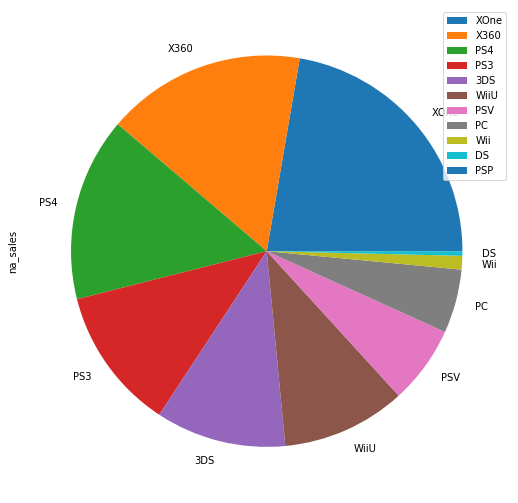

In [59]:
#Построим график 'pie' для наглядности
na_sales.plot(y='na_sales',kind='pie', figsize=(9,9))

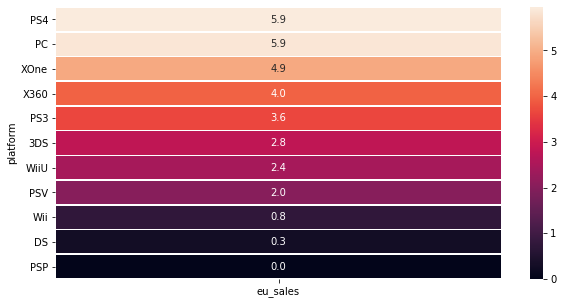

In [60]:
#Построим тепловую карту (heatmap), чтобы посмотреть самые популярные платформы в регионе EU
eu_sales = df_2013.pivot_table(
                        index='platform', 
                        values='eu_sales', 
                        aggfunc=sum).fillna(0).applymap(float).sort_values(by='eu_sales', ascending=False)
                        

sns.heatmap(eu_sales, annot=True, fmt=".1f", linewidths=.5)

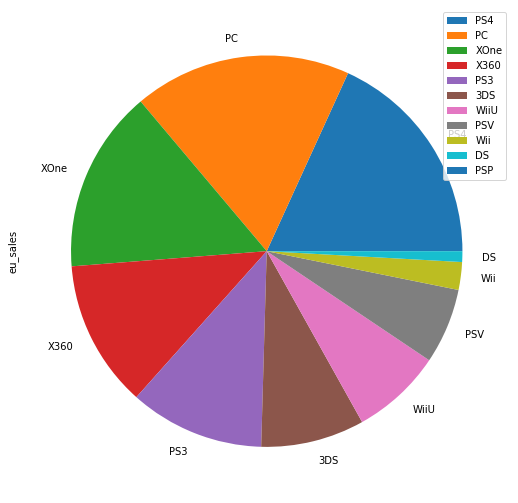

In [61]:
#Построим график 'pie' для наглядности
eu_sales.plot(y='eu_sales',kind='pie', figsize=(9,9))

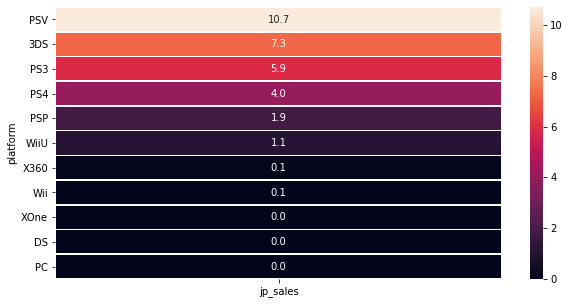

In [62]:
#Построим тепловую карту (heatmap), чтобы посмотреть самые популярные платформы в регионе JP
jp_sales = df_2013.pivot_table(
                        index='platform', 
                        values='jp_sales', 
                        aggfunc=sum).fillna(0).applymap(float).sort_values(by='jp_sales', ascending=False)
                        

sns.heatmap(jp_sales, annot=True, fmt=".1f", linewidths=.5)

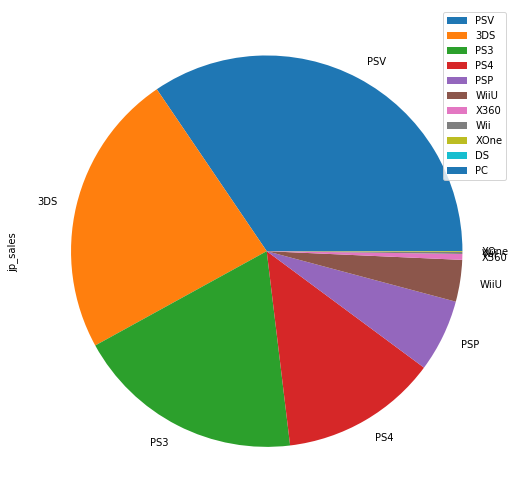

In [63]:
#Построим график 'pie' для наглядности
jp_sales.plot(y='jp_sales',kind='pie', figsize=(9,9))

### Что в итоге получилось по популярности платформ в разных регионах:
* Топ 5 платформ NA: **PS4, XOne, X360, PS3, 3DS**
* Топ 5 платформ EU: **PS4, PS3, XOne, X360, 3DS**
* Топ 5 платформ JP: **3DS, PS3, PSV, PS4, WiiU**

#### В европе и северной америке похожее распределение по предпочтительным платформам. 
#### А вот в Японии в топ 5 исключительно японские платформы, японцы очень патриотичны, либо стоимость местных платформ там значительно ниже, а может и то и другое😄

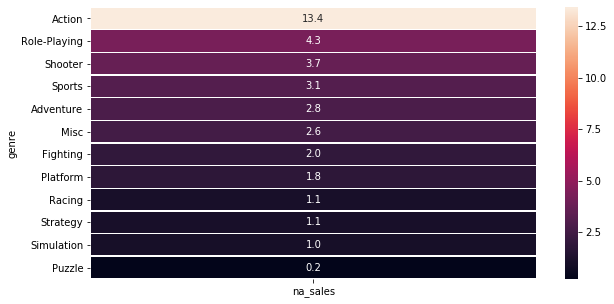

In [64]:
#Теперь посмотрим как дело обстоит с жанрами в разных регионах
#Построим тепловую карту (heatmap), чтобы посмотреть самые популярные жанры в регионе NA
na_genre_sales = df_2013.pivot_table(
                        index='genre', 
                        values='na_sales', 
                        aggfunc=sum).fillna(0).applymap(float).sort_values(by='na_sales', ascending=False)
                        

sns.heatmap(na_genre_sales, annot=True, fmt=".1f", linewidths=.5)

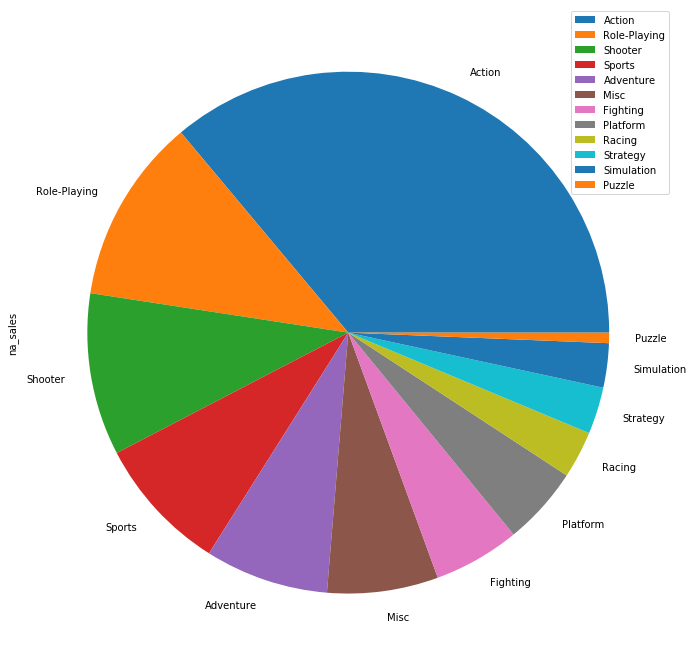

In [65]:
#Построим график 'pie' для наглядности
na_genre_sales.plot(y='na_sales',kind='pie', figsize=(12,12))

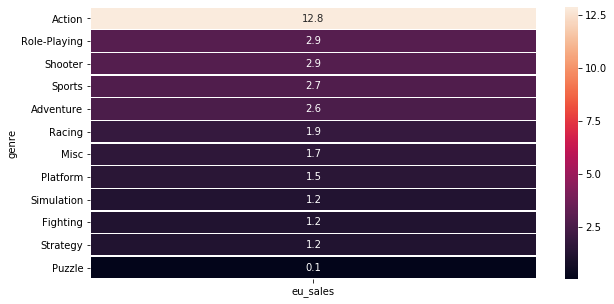

In [66]:
#Построим тепловую карту (heatmap), чтобы посмотреть самые популярные жанры в регионе EU
eu_genre_sales = df_2013.pivot_table(
                        index='genre', 
                        values='eu_sales', 
                        aggfunc=sum).fillna(0).applymap(float).sort_values(by='eu_sales', ascending=False)
                        

sns.heatmap(eu_genre_sales, annot=True, fmt=".1f", linewidths=.5)

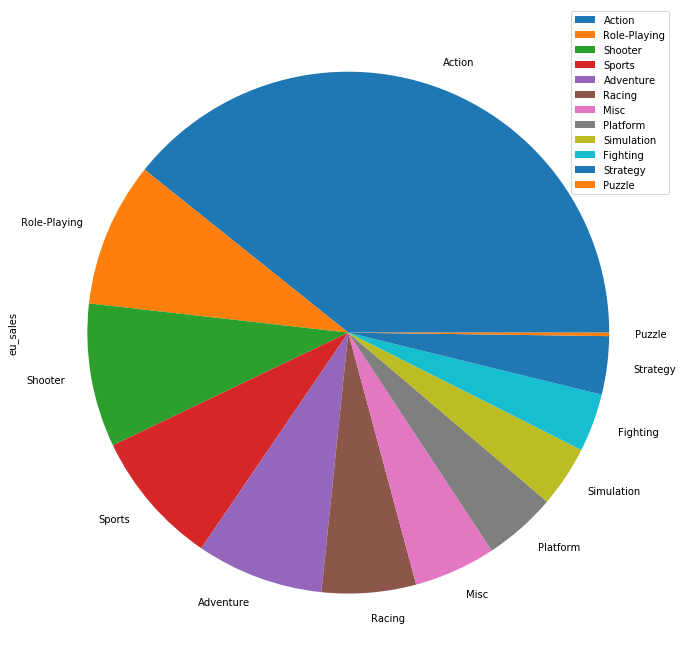

In [67]:
#Построим график 'pie' для наглядности
eu_genre_sales.plot(y='eu_sales',kind='pie', figsize=(12,12))

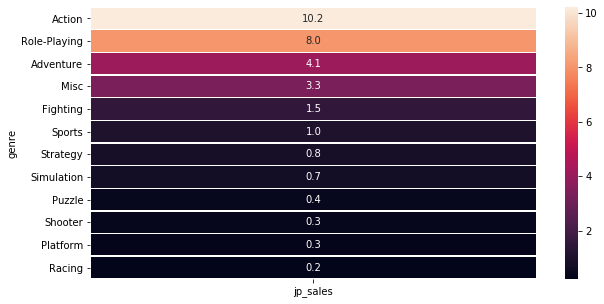

In [68]:
#Построим тепловую карту (heatmap), чтобы посмотреть самые популярные жанры в регионе jp
jp_genre_sales = df_2013.pivot_table(
                        index='genre', 
                        values='jp_sales', 
                        aggfunc=sum).fillna(0).applymap(float).sort_values(by='jp_sales', ascending=False)
                        

sns.heatmap(jp_genre_sales, annot=True, fmt=".1f", linewidths=.5)

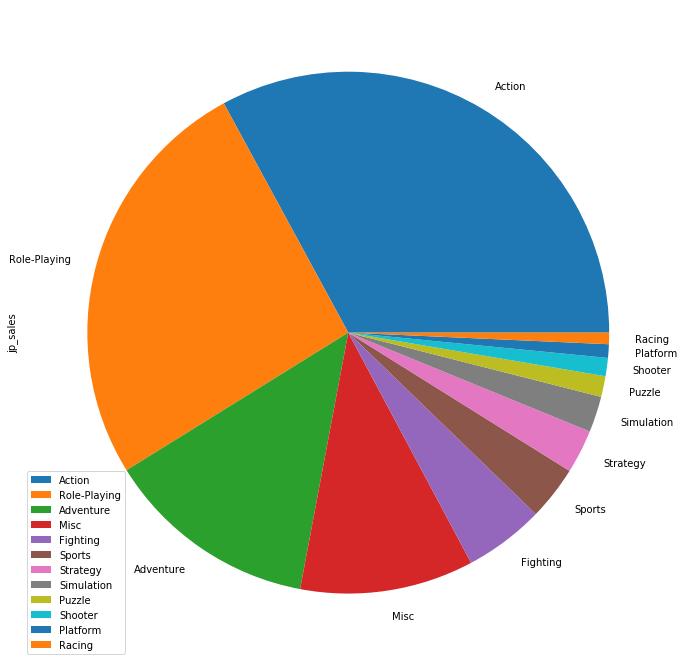

In [69]:
#Построим график 'pie' для наглядности
jp_genre_sales.plot(y='jp_sales',kind='pie', figsize=(12,12))

### Что в итоге получилось по популярности жанров в разных регионах:

* Топ 5 жанров NA: **Action, Shooter, Sports, Role-Playing, Misc**
* Топ 5 жанров EU: **Action, Shooter, Sports, Role-Playing, Racing**
* Топ 5 жанров JP: **Role-Playing, Action, Misc, Fighting, Shooter**

**В европе и северной америке опять похожее распределение, единственное, европейцы больше любят гоночные игры.** 

**А вот японцы как обычно отличились.**

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

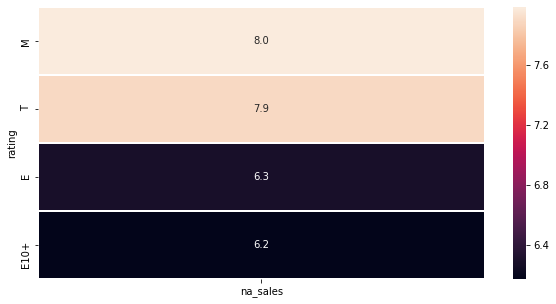

In [70]:
#Заодно посмотрим с распределением по платформам
ESRB_sales_NA = df_2013.pivot_table(
                        index='rating', 
                        values='na_sales', 
                        aggfunc=sum).fillna(0).applymap(float).sort_values(by='na_sales', ascending=False)


sns.heatmap(ESRB_sales_NA, annot=True, fmt=".1f", linewidths=.5)

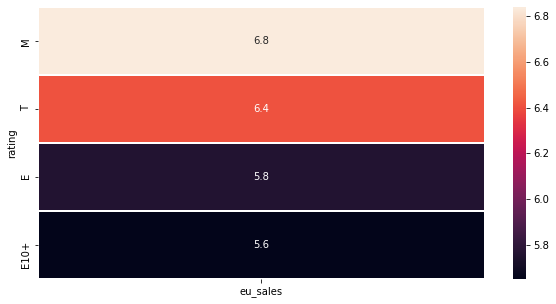

In [71]:
#Заодно посмотрим с распределением по платформам
ESRB_sales_EU = df_2013.pivot_table(
                        index='rating', 
                        values='eu_sales', 
                        aggfunc=sum).fillna(0).applymap(float).sort_values(by='eu_sales', ascending=False)


sns.heatmap(ESRB_sales_EU, annot=True, fmt=".1f", linewidths=.5)

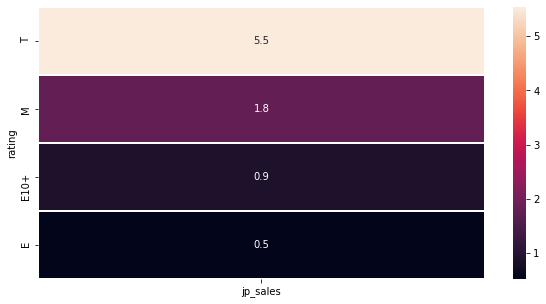

In [72]:
#Заодно посмотрим с распределением по платформам
ESRB_sales_JP = df_2013.pivot_table(
                        index='rating', 
                        values='jp_sales', 
                        aggfunc=sum).fillna(0).applymap(float).sort_values(by='jp_sales', ascending=False)


sns.heatmap(ESRB_sales_JP, annot=True, fmt=".1f", linewidths=.5)

#### Выдержка по интересующим нас рейтингам ESRB из Википедии:

* **«E» («Everyone») — «Для всех»:** Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.

* **«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»:** Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови.

* **«T» («Teen») — «Подросткам»:** Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

* **«M» («Mature») — «Для взрослых»:** Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

#### Распределение продаж относительно рейтинга ESRB  по регионам в порядке убывания:

* **Северная Америка (NA):**M, E, E10+, T 
* **Европа (EU):** M, E, E10+, T 
* **Япония (JP):** T, E, M, E10+

#### Опять похожая картина, Европа и С.Америка похожи по продажам игр относительно рейтинга ESRB, а Япония отличается.

<div class="alert alert-info">
    
**ВЫВОД (ШАГ 4):**📝

**ПОРТРЕТ АМЕРИКАНСКОГО ПОЛЬЗОВАТЕЛЯ(NA):**
* Любимые платформы: **PS4, XOne**
* Любимые жанры: **Action, Shooter**
* Отдаёт предпочтение играм для взрослых (рейтинг ESRB - M)
    
**ПОРТРЕТ ЕВРОПЕЙСКОГО ПОЛЬЗОВАТЕЛЯ(EU):**
* Любимые платформы: **PS4, PS3**
* Любимые жанры: **Action, Shooter**
* Отдаёт предпочтение играм для взрослых (рейтинг ESRB - M)    

**ПОРТРЕТ ЯПОНСКОГО ПОЛЬЗОВАТЕЛЯ(JP):**
* Любимые платформы: **3DS, PS3**
* Любимые жанры: **Role-Playing, Action**
* Отдаёт предпочтение играм c возрастным ограничением от **13 лет (рейтинг ESRB - T)** 
    
**Получается, что магазину не обязательно подстраиваться под EU/NA рынок т.к. нет критических отличий в предпочтениях аудитории этих регионов. А вот под японский рынок придётся конкретно подстроиться, главное придерживаться принципа - "Японцам - японское"**

<br>
    
</div>

#  Шаг 5. Проверка гипотез. 
**Рейтинги платформ:**
* **H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**
* **H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются;**

**Средние пользовательские рейтинги:**
* **H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.**
* **H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

**Необходимы пояснения:**
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.
* Пороговое значение alpha задаём самостоятельно.

In [73]:
#Выделим платформу PC
platform_dict=['PC']
PC_data=df_2013.query('platform in @platform_dict')

In [74]:
#Выведем значения
PC_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
6995,XCOM 2,PC,2016,Strategy,0.09,0.12,0.0,0.02,88,7.1,T,0.23
7038,Tom Clancy's Rainbow Six: Siege,PC,2015,Shooter,0.13,0.08,0.0,0.02,79,6.9,M,0.23
7383,Assassin's Creed Syndicate,PC,2015,Action,0.11,0.09,0.0,0.02,74,5.9,M,0.22
7466,Defiance,PC,2013,Shooter,0.14,0.04,0.0,0.02,64,6.5,M,0.20
7639,Dying Light,PC,2015,Action,0.12,0.06,0.0,0.02,75,7.9,M,0.20


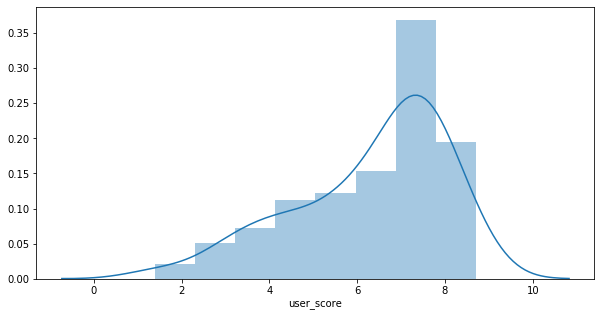

In [75]:
#Выведем график распределения отдельно для PC

sns.distplot(PC_data['user_score'].dropna())

In [76]:
#Выделим платформу XOne
platform_dict2=['XOne']
XOne_data=df_2013.query('platform in @platform_dict2')

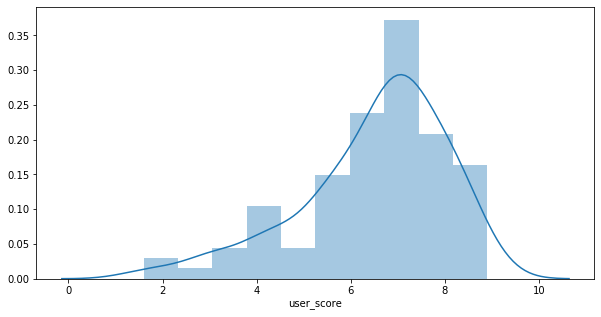

In [77]:
#Выведем график распределения отдельно для XOne
sns.distplot(XOne_data['user_score'].dropna())

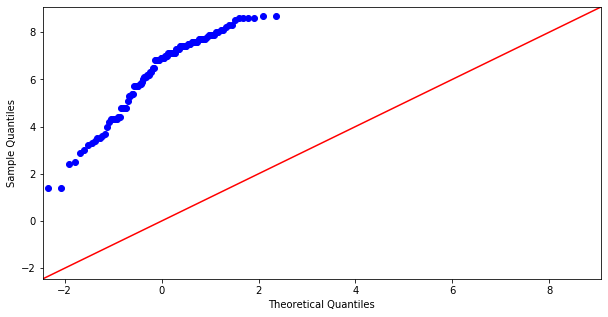

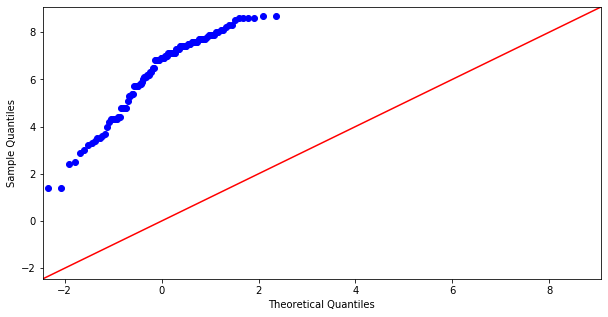

In [78]:
sm.qqplot(PC_data['user_score'].dropna(), line='45')

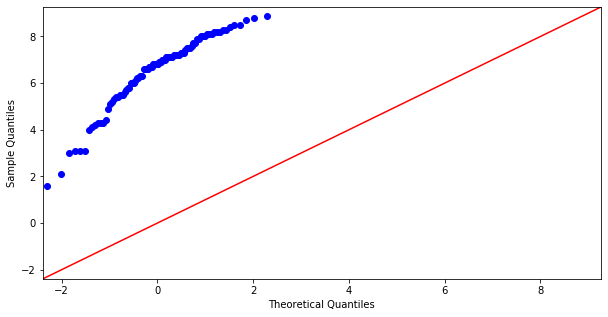

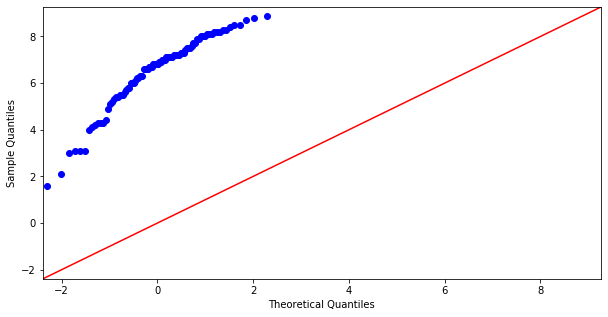

In [79]:
sm.qqplot(XOne_data['user_score'].dropna(), line='45')

# Выбор критерия
* **Тип данных:** количественный
* **Тип распределения:** отличное от нормального
* **Зависимость групп**: независимые (разные платформы)
* **Количество групп:** 2

#### *В данном случае подойдёт критерий Манна-Уитни, поскольку он отвечает условиям нашего исследования.*


In [80]:
#Проведём тест Стьюдента для проверки гипотезы

pc=PC_data['user_score'].dropna()
xone=XOne_data['user_score'].dropna()

alpha = .01 
results = st.mannwhitneyu(pc, xone, alternative='two-sided')

print('p-значение: {:.50f}'.format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.71286197123160177646639112936099991202354431152344
Не получилось отвергнуть нулевую гипотезу


### Нулевую гипотезу H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые отвергуть не получилось.


In [81]:
#Выделим жанр Action
genre_dict=['Action']
action_data=df_2013.query('genre in @genre_dict')

In [82]:
#Выведем первые 10 строчек для проверки
action_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
4793,The Wonderful 101,WiiU,2013,Action,0.19,0.10,0.08,0.03,78,8.5,T,0.40
5317,LEGO Marvel's Avengers,XOne,2016,Action,0.19,0.12,0.00,0.03,71,5.1,E10+,0.34
5403,Disney Infinity 3.0,XOne,2015,Action,0.20,0.11,0.00,0.03,NaN,NaN,NaN,0.34
5689,LEGO Marvel's Avengers,X360,2016,Action,0.18,0.11,0.00,0.03,NaN,5.7,E10+,0.32
5730,Batman: Arkham Origins,WiiU,2013,Action,0.19,0.09,0.00,0.03,68,7.4,T,0.31
5735,Sonic Boom: Rise of Lyric,WiiU,2014,Action,0.19,0.09,0.00,0.03,32,3.6,E10+,0.31
5753,Skylanders: SuperChargers,PS4,2015,Action,0.17,0.08,0.00,0.05,81,3.3,E10+,0.30
5894,Dynasty Warriors 8: Xtreme Legends,PS4,2014,Action,0.09,0.11,0.06,0.04,NaN,NaN,NaN,0.30
5954,Disney Infinity,3DS,2013,Action,0.17,0.10,0.00,0.02,NaN,NaN,NaN,0.29
5988,Deadpool,PS4,2015,Action,0.14,0.11,0.00,0.05,60,5.7,M,0.30


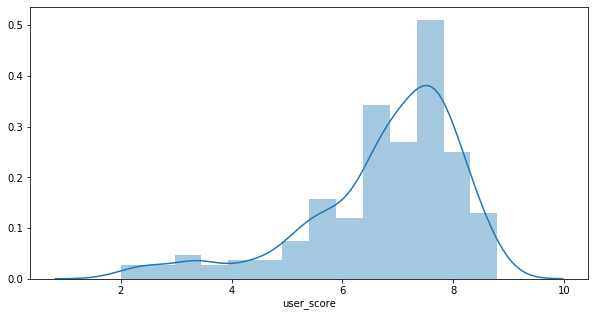

In [83]:
#Выведем график распределения для жанра Action

sns.distplot(action_data['user_score'].dropna())

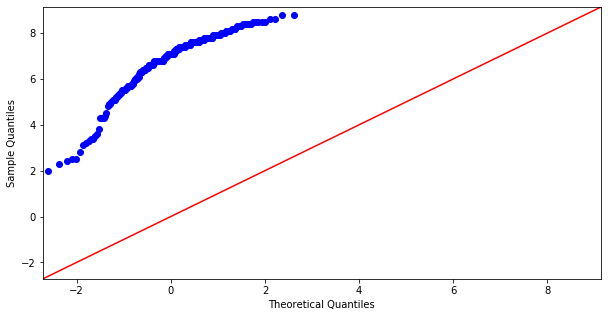

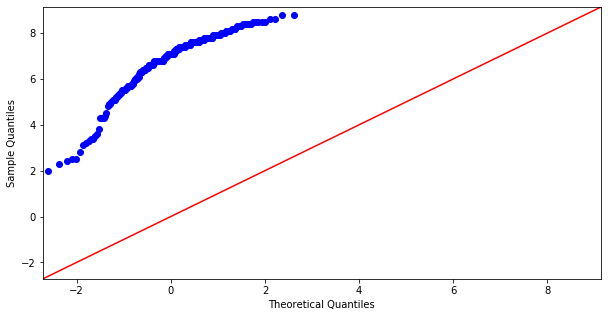

In [84]:
sm.qqplot(action_data['user_score'].dropna(), line='45')

In [85]:
#Выделим жанр Sports
genre_dict2=['Sports']
sports_data=df_2013.query('genre in @genre_dict2')

In [86]:
#Выведем первые 10 строчек для проверки
sports_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
5262,Tiger Woods PGA Tour 14,X360,2013,Sports,0.21,0.12,0.0,0.03,77,6.2,E,0.36
6487,WWE 2K17,XOne,2016,Sports,0.12,0.12,0.0,0.02,68,5.5,T,0.26
6854,NHL 17,XOne,2016,Sports,0.20,0.01,0.0,0.03,77,4.0,E10+,0.24
6911,NBA Live 14,PS4,2013,Sports,0.15,0.05,0.0,0.04,43,2.7,E,0.24
6955,NBA Live 15,PS4,2014,Sports,0.16,0.04,0.0,0.04,59,5.6,E,0.24
7434,NBA Live 15,XOne,2014,Sports,0.17,0.02,0.0,0.02,53,6.8,E,0.21
7479,Tony Hawk's Pro Skater 5,PS4,2015,Sports,0.09,0.08,0.0,0.03,32,1.5,T,0.20
7579,NBA Live 14,XOne,2013,Sports,0.16,0.02,0.0,0.02,36,3.1,E,0.20
8198,NBA Live 16,PS4,2015,Sports,0.10,0.04,0.0,0.03,59,6.1,E,0.17
8265,Madden NFL 17,X360,2016,Sports,0.14,0.02,0.0,0.02,NaN,0.7,E,0.18


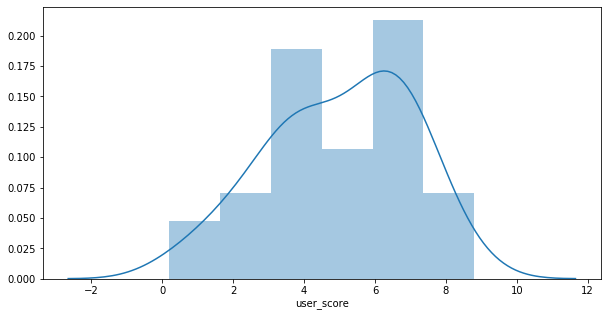

In [87]:
#Выведем график распределения для жанра Sports

sns.distplot(sports_data['user_score'].dropna())

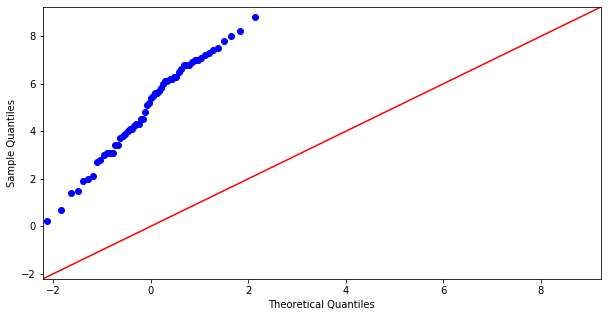

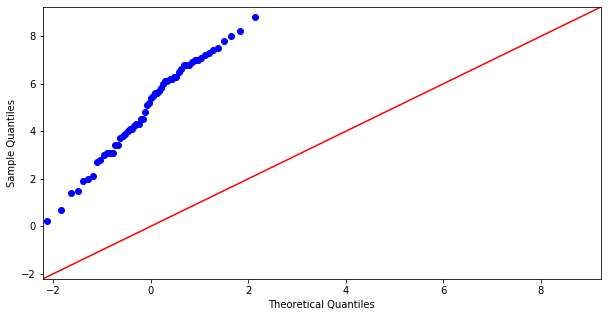

In [88]:
sm.qqplot(sports_data['user_score'].dropna(), line='45')

# Выбор критерия
* **Тип данных:** количественный
* **Тип распределения:** отличное от нормального
* **Зависимость групп**: независимые (разные жанры)
* **Количество групп:** 2

#### *В данном случае подойдёт критерий Манна-Уитни, поскольку он отвечает условиям нашего исследования.*


In [89]:
#Проверим гипотезу теста Манна-Уитни

action=action_data['user_score'].dropna()
sports=sports_data['user_score'].dropna()
alpha = .01
results = st.mannwhitneyu(action, sports, alternative='two-sided')

print('p-значение: {:.50f}'.format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00000000023683844124023636376800416824520058994841
Отвергаем нулевую гипотезу


### Подтвердилась гипотеза H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные




<div class="alert alert-info">
    
    
**ВЫВОД (ШАГ 5):**📝

****
**Рейтинги платформ:**
* **H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;** - не удалось отвергнуть нулевую гипотезу
* **H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются;**

**Средние пользовательские рейтинги:**
* **H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.** - отвергаем нулевую гипотезу
* **H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

**В ходе исследования можно сделать предварительные выводы:** 
* Что есть статистически значимая вероятность того, что пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Что есть сильная статистически значимая вероятность того, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
    
<br>
    
</div>

# ---------------------------------------------------------------------------------------------------------------

#  Шаг 6. Общий вывод. 

<div class="alert alert-info">
    
    
**ВЫВОД (ШАГ 6):**📝

**Для планирования рекламной компании после проведённого анализа можно выделить следующие закономерности (рекомендации):**
--
* Выбирать преимущественно игры платформ, продажи которых растут в последние годы (2013-2016): **XOne, PS4**
* Ориентироваться на **рейтинг критиков**, а не на рейтинг пользователей.
* Ориентироваться на самые распространённые жанры по **количеству** игр: **Action, Role-Playing, Adventure, Sports, Shooter.**
* Ориентироваться на самые **прибыльные** жанры:  **Action, Shooter, Sports, Role-Playing, Misc.**
* Избегать рекламных компаний по непопулярным жанрам, например **Puzzle**
* При планировании рекламных компаний по конкретному региону, ориентироваться на портреты пользователя для каждого региона:
    
**ПОРТРЕТ АМЕРИКАНСКОГО ПОЛЬЗОВАТЕЛЯ(NA):**
* Любимые платформы: **PS4, XOne**
* Любимые жанры: **Action, Shooter**
* Отдаёт предпочтение играм для взрослых **(рейтинг ESRB - M)**
    
**ПОРТРЕТ ЕВРОПЕЙСКОГО ПОЛЬЗОВАТЕЛЯ(EU):**
* Любимые платформы: **PS4, PS3**
* Любимые жанры: **Action, Shooter**
* Отдаёт предпочтение играм для взрослых **(рейтинг ESRB - M)**

**ПОРТРЕТ ЯПОНСКОГО ПОЛЬЗОВАТЕЛЯ(JP):**
* Любимые платформы: **3DS, PS3**
* Любимые жанры: **Role-Playing, Action**
* Отдаёт предпочтение играм c возрастным ограничением от **13 лет (рейтинг ESRB - T)** 
    
**Можно использовать совместные промо-компании для европейского и северо-американского региона, а вот в японии "свои" законы и рекламная компания должна быть отдельная**

    
**Также можно в планировании держать в голове следующие проверенные гипотезы:** 
* **H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**
* **H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**    
    
**Данная информация позволит более точно спланировать рекламную компанию на 2017 год.**
--    
<br>
    
</div>